In [76]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles


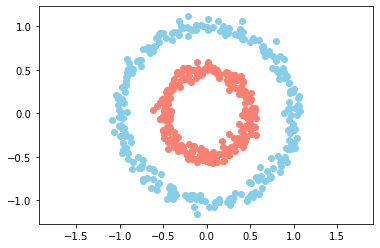

In [68]:
# CREAR DATASET

n = 500 # nº de registros en nuestros datos
p = 2   # nº de caracteristicas de nuestros datos

# En un problema real tanto p como n serían mucho más grandes

X, Y = make_circles(n_samples=n, factor = 0.5, noise = 0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0]== 0, 0],X[Y[:, 0]== 0, 1], c = "skyblue")
plt.scatter(X[Y[:, 0]== 1, 0],X[Y[:, 0]== 1, 1], c = "salmon")
plt.axis("equal")
plt.show()


In [69]:
# Clase de la capa de la red

class neural_layer():

  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f

    self.b = np.random.rand(1, n_neur)      * 2 - 1 # Parámetro de bayes
    self.w = np.random.rand(n_conn, n_neur) * 2 - 1 # Parámetro pesos



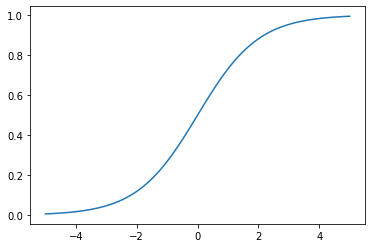

In [70]:
# Funciones de activación
# Vamos a introducir no linealidad en las neuronas

sign = (lambda x: 1/(1+np.e**(-x)), # Función sigmoide
        lambda x: x * (1-x)       ) # Derivada

relu = lambda x: np.maximum(0, x)   # Función relu


_x = np.linspace(-5, 5, 100)
plt.plot(_x, sign[0](_x))



In [71]:
l0 = neural_layer(p, 4, sign)
l1 = neural_layer(4, 8, sign)
# ...

def create_nn(topology, act_f):
  
  nn = []

  for l, layer in enumerate(topology[:-1]): # Para que no haya overflow

    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn

In [72]:

topology = [p, 4, 8, 4, 1] # Topología

neural_net = create_nn(topology, sign)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr = 0.5, train = True): # lr -> learning rate

  out = [(None, X)]

  # Forward pass

  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].w + neural_net[l].b   # @ -> Multiplicacion matricial, z -> suma ponderada
    a = neural_net[l].act_f[0](z)    # Activacion (Salida capa 1)

    out.append((z, a))

  print(l2_cost[0](out[-1][1], Y))

  if train:

    # Backward pass

    deltas = []

    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]

      #print(a.shape)   # Salidas por cada capa hacia atrás

      if l == len(neural_net) - 1:
        # Calcular delta ultima capa
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a)) 
      else:
        # Calcular delta respecto a capa previa
        deltas.insert(0, deltas[0] @ _w.T * neural_net[1].act_f[1](a))
      
      _w = neural_net[l].w

      # Gradient descent

      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis = 0, keepdims = True) * lr
      neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr

    return out[-1][1]


train(neural_net, X, Y, l2_cost, 0.5 )
print("")



0.2501311823544223



In [77]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sign)

loss = []

for i in range(2500):

  # Entrenamos a la red

  pY = train(neural_n, X, Y, l2_cost, lr = 0.05)

  if i % 25 == 0:
    
    #print(pY)
    loss.append(l2_cost[0](pY, Y))
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):

        print(l2_cost)

        _y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train = False)
  
    plt.pcolormesh(_x0, _x1, _y, cmap = "coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c = "skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c = "salmon")

    clear_output(wait = True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)
    print("")


NameError: name 'ptl' is not defined